In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
financial = pd.read_csv('/content/Financial_Planning_Dataset.csv')
financial.head()

,Monthly_Income,Monthly_Expenditure,Market_Volatility_Index,Inflation_Rate,Investment_Amount,Savings_Ratio,Credit_Score,Debt_to_Income_Ratio,Risk_Tolerance_Level,Economic_Sentiment_Score,Investor_Confidence,Financial_Stability_Index,Investment_Recommendation_Score
0,89934.28,43504.93,25.33,5.89,37259.20,0.307,667.0,0.417,0.772,0.394,30.98,0.605,46.86
1,77234.71,34932.02,12.57,2.44,38774.65,0.383,688.0,0.586,0.828,0.174,97.13,0.615,72.14
2,92953.77,66760.80,17.56,4.25,92226.58,0.286,653.0,0.541,0.171,0.666,11.79,0.506,49.04
3,110460.60,83203.10,33.72,6.82,123179.17,0.065,756.0,0.498,0.897,-0.855,95.83,0.496,42.73
4,75316.93,31316.26,66.18,4.60,25316.93,0.481,685.0,0.168,0.656,0.381,9.10,0.719,47.99


## Personal Finance KPI Creation

In [ ]:
financial['Savings_Efficiency'] = financial['Savings_Ratio'] * financial['Monthly_Income']
financial['Discretionary_Income'] = financial['Monthly_Income'] - financial['Monthly_Expenditure']
financial["Investment_Capacity_Index"] = ((financial["Monthly_Income"] - financial["Monthly_Expenditure"]) / financial["Monthly_Income"]) * (1 - financial["Debt_to_Income_Ratio"]) * financial["Risk_Tolerance_Level"]
financial["Financial_Stress_Index"] = 1 - financial["Financial_Stability_Index"]
financial.head()

,Monthly_Income,Monthly_Expenditure,Market_Volatility_Index,Inflation_Rate,Investment_Amount,Savings_Ratio,Credit_Score,Debt_to_Income_Ratio,Risk_Tolerance_Level,Economic_Sentiment_Score,Investor_Confidence,Financial_Stability_Index,Investment_Recommendation_Score,Savings_Efficiency,Discretionary_Income,Investment_Capacity_Index,Financial_Stress_Index
0,89934.28,43504.93,25.33,5.89,37259.20,0.307,667.0,0.417,0.772,0.394,30.98,0.605,46.86,27609.82396,46429.35,0.232356,0.395
1,77234.71,34932.02,12.57,2.44,38774.65,0.383,688.0,0.586,0.828,0.174,97.13,0.615,72.14,29580.89393,42302.69,0.187753,0.385
2,92953.77,66760.80,17.56,4.25,92226.58,0.286,653.0,0.541,0.171,0.666,11.79,0.506,49.04,26584.77822,26192.97,0.022117,0.494
3,110460.60,83203.10,33.72,6.82,123179.17,0.065,756.0,0.498,0.897,-0.855,95.83,0.496,42.73,7179.93900,27257.50,0.111116,0.504
4,75316.93,31316.26,66.18,4.60,25316.93,0.481,685.0,0.168,0.656,0.381,9.10,0.719,47.99,36227.44333,44000.67,0.318855,0.281


## Descriptive Analysis


In [ ]:
financial.isnull().sum()

,0
Monthly_Income,0
Monthly_Expenditure,0
Market_Volatility_Index,0
Inflation_Rate,0
Investment_Amount,0
Savings_Ratio,0
Credit_Score,0
Debt_to_Income_Ratio,0
Risk_Tolerance_Level,0
Economic_Sentiment_Score,0


In [ ]:
financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Monthly_Income                   1000 non-null   float64
 1   Monthly_Expenditure              1000 non-null   float64
 2   Market_Volatility_Index          1000 non-null   float64
 3   Inflation_Rate                   1000 non-null   float64
 4   Investment_Amount                1000 non-null   float64
 5   Savings_Ratio                    1000 non-null   float64
 6   Credit_Score                     1000 non-null   float64
 7   Debt_to_Income_Ratio             1000 non-null   float64
 8   Risk_Tolerance_Level             1000 non-null   float64
 9   Economic_Sentiment_Score         1000 non-null   float64
 10  Investor_Confidence              1000 non-null   float64
 11  Financial_Stability_Index        1000 non-null   float64
 12  Investment_Recommenda

In [ ]:
financial.describe()

,Monthly_Income,Monthly_Expenditure,Market_Volatility_Index,Inflation_Rate,Investment_Amount,Savings_Ratio,Credit_Score,Debt_to_Income_Ratio,Risk_Tolerance_Level,Economic_Sentiment_Score,Investor_Confidence,Financial_Stability_Index,Investment_Recommendation_Score,Savings_Efficiency,Discretionary_Income,Investment_Capacity_Index,Financial_Stress_Index
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,80410.818680,52484.634110,44.614560,4.959440,103998.104940,0.323741,697.278000,0.390655,0.495175,-0.007895,51.296850,0.586785,49.468900,26068.070998,27926.18457,0.104559,0.413215
std,19515.524103,17579.741611,20.224356,1.714136,54892.740462,0.159799,50.799422,0.172700,0.278847,0.572726,28.660649,0.077996,21.688001,14823.237126,13591.20316,0.085727,0.077996
min,30000.000000,17914.880000,10.000000,2.000000,10043.140000,0.052000,555.000000,0.100000,0.000000,-1.000000,0.250000,0.382000,0.000000,1830.000000,3429.07000,0.000000,0.223000
25%,67048.192500,39426.410000,27.955000,3.487500,55686.997500,0.184000,665.000000,0.240000,0.265750,-0.500250,27.280000,0.527000,33.015000,13889.262225,17183.15250,0.039814,0.353000
50%,80506.010000,50145.615000,44.420000,4.940000,101927.960000,0.321500,697.000000,0.384500,0.495500,-0.007000,51.405000,0.587000,49.810000,23752.627180,25822.27000,0.083415,0.413000
75%,92958.877500,64469.610000,61.702500,6.410000,152403.490000,0.464250,730.250000,0.536250,0.725000,0.489500,76.142500,0.647000,65.472500,36746.682170,36783.86000,0.148131,0.473000
max,157054.630000,112335.000000,79.850000,8.000000,199420.390000,0.600000,850.000000,0.698000,0.999000,0.999000,99.970000,0.777000,100.000000,76007.097720,73056.30000,0.495992,0.618000


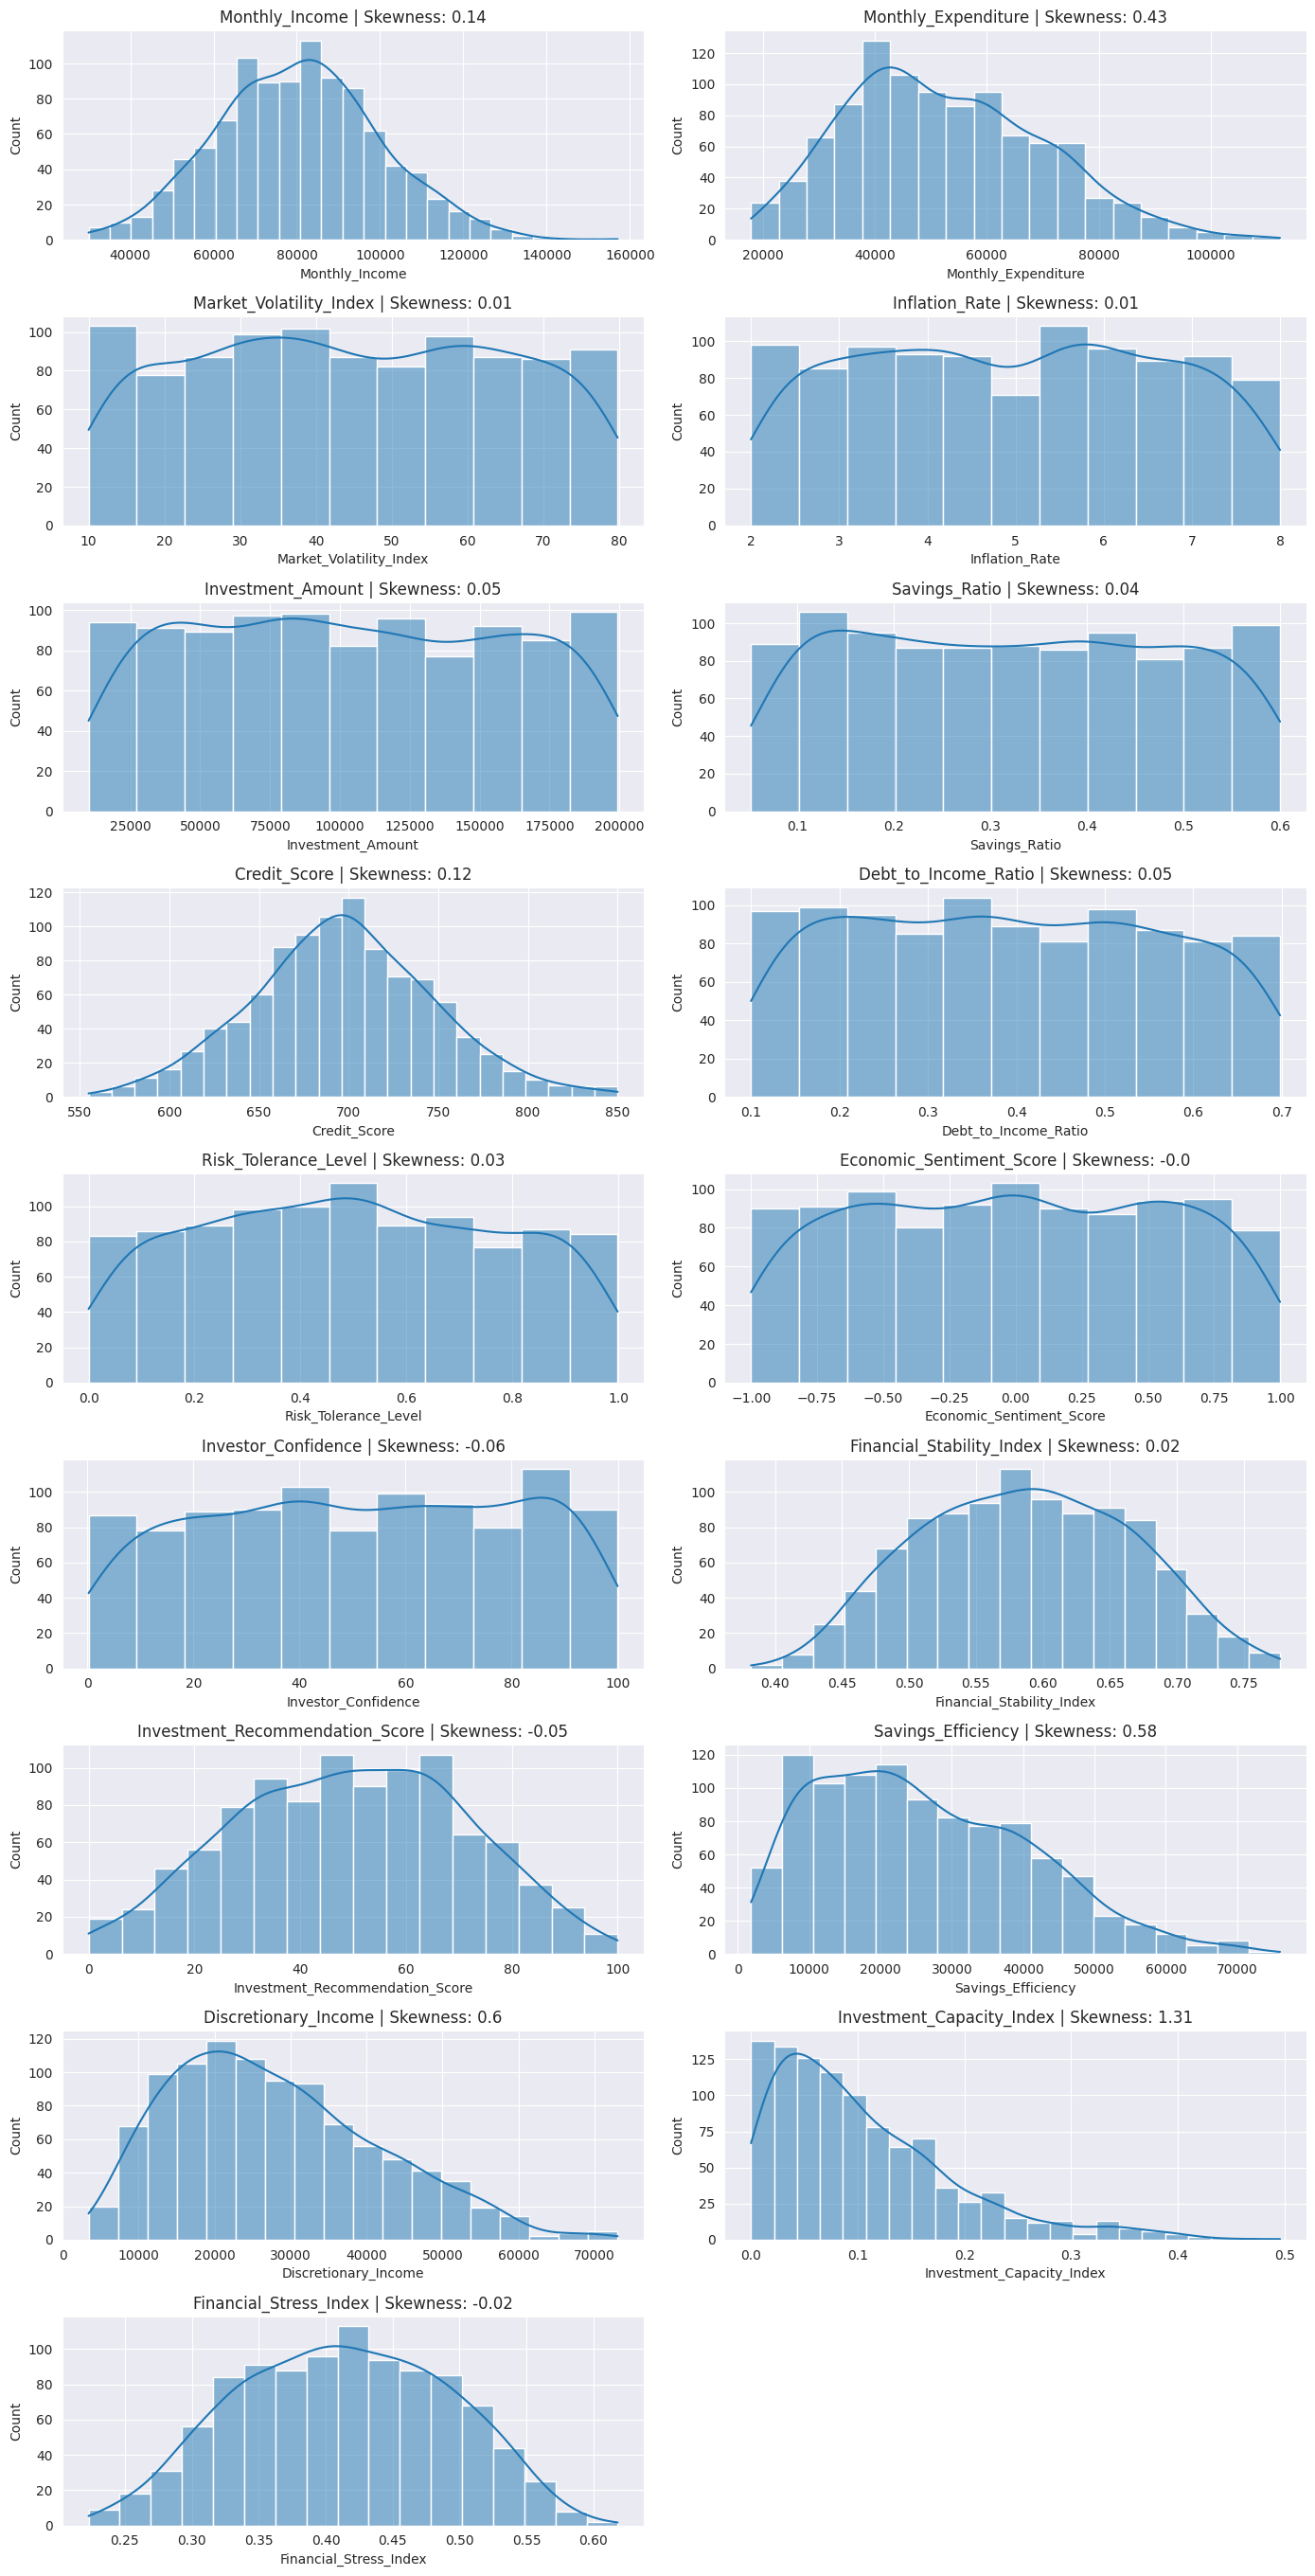

In [ ]:
sns.set_style("darkgrid")

numerical_columns = financial.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(financial[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(financial[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

## Correlation Analysis

Text(0.5, 1.0, 'Correlation Heatmap')

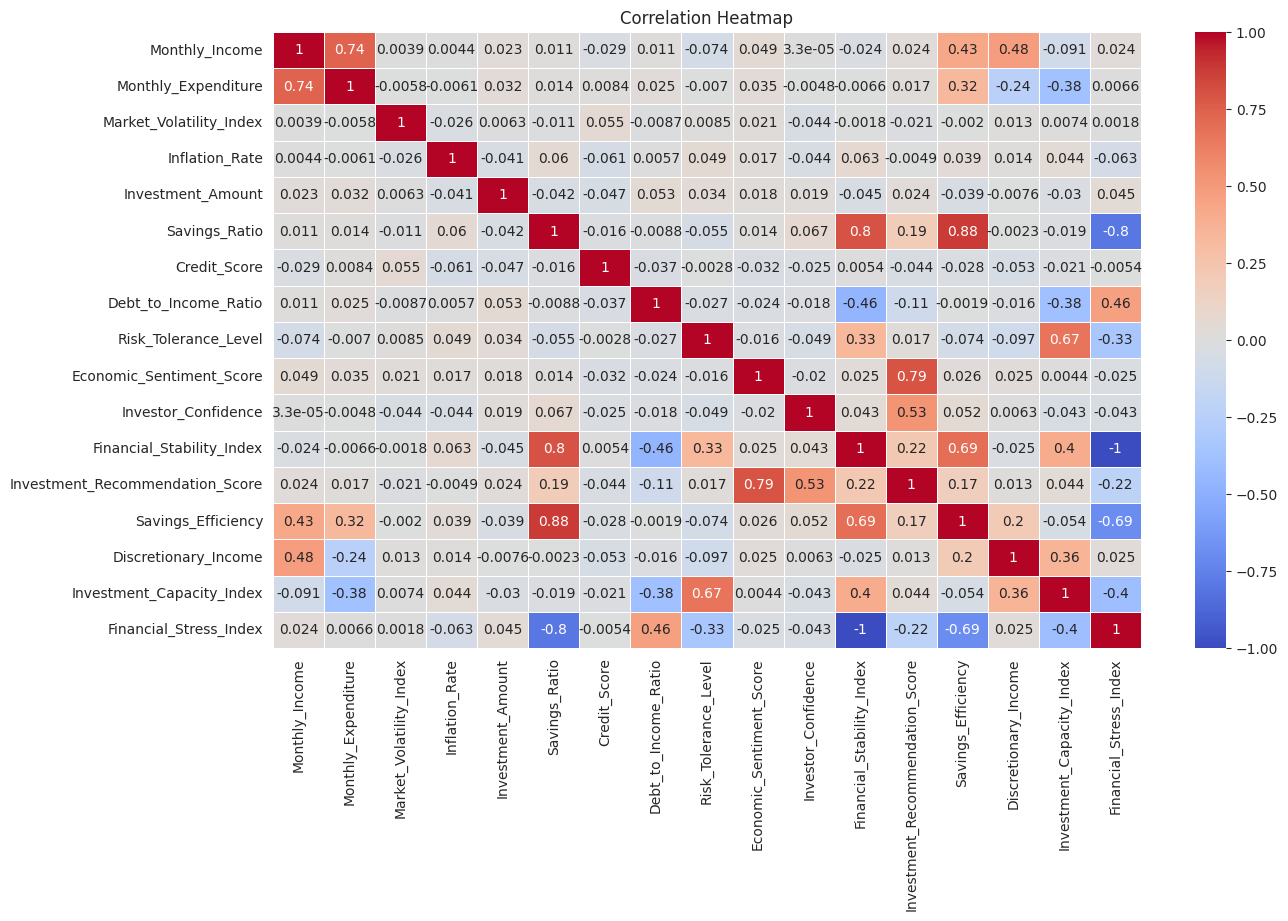

In [ ]:
financialcorr = financial.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(financialcorr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

## Risk Assessment Analysis

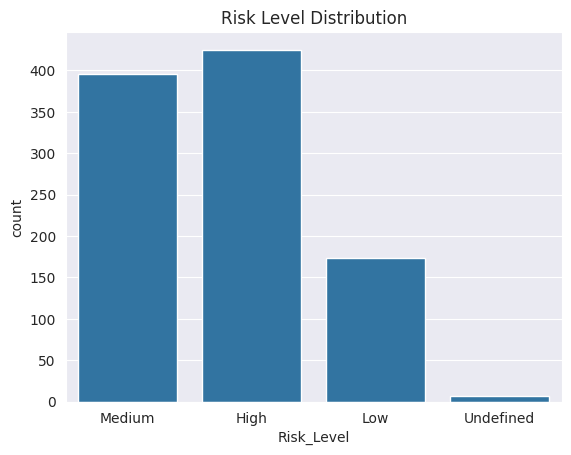

In [ ]:
conditions = [
    (financial['Debt_to_Income_Ratio'] < 0.3) & (financial['Credit_Score'] > 700),
    (financial['Debt_to_Income_Ratio'] < 0.5) & (financial['Credit_Score'] > 650),
    (financial['Debt_to_Income_Ratio'] >= 0.5) | (financial['Credit_Score'] < 650)
]
risk_labels = ['Low', 'Medium', 'High']
financial['Risk_Level'] = np.select(conditions, risk_labels, default='Undefined')

sns.countplot(data=financial, x='Risk_Level')
plt.title("Risk Level Distribution")
plt.show()

## Linear Regression

In [ ]:
financial = financial.drop(['Financial_Stress_Index','Savings_Efficiency','Risk_Level'], axis=1)

In [ ]:
financial.head()

,Monthly_Income,Monthly_Expenditure,Market_Volatility_Index,Inflation_Rate,Investment_Amount,Savings_Ratio,Credit_Score,Debt_to_Income_Ratio,Risk_Tolerance_Level,Economic_Sentiment_Score,Investor_Confidence,Financial_Stability_Index,Investment_Recommendation_Score,Discretionary_Income,Investment_Capacity_Index
0,89934.28,43504.93,25.33,5.89,37259.20,0.307,667.0,0.417,0.772,0.394,30.98,0.605,46.86,46429.35,0.232356
1,77234.71,34932.02,12.57,2.44,38774.65,0.383,688.0,0.586,0.828,0.174,97.13,0.615,72.14,42302.69,0.187753
2,92953.77,66760.80,17.56,4.25,92226.58,0.286,653.0,0.541,0.171,0.666,11.79,0.506,49.04,26192.97,0.022117
3,110460.60,83203.10,33.72,6.82,123179.17,0.065,756.0,0.498,0.897,-0.855,95.83,0.496,42.73,27257.50,0.111116
4,75316.93,31316.26,66.18,4.60,25316.93,0.481,685.0,0.168,0.656,0.381,9.10,0.719,47.99,44000.67,0.318855


In [ ]:
X = financial.drop('Investment_Recommendation_Score', axis=1)
y = financial['Investment_Recommendation_Score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
financiallin = LinearRegression()
financiallin.fit(X, y)

LinearRegression()

In [ ]:
y_pred = financiallin.predict(X)

In [ ]:
print("Mean Squared Error:", mean_squared_error(y, y_pred))
print("R-squared:", r2_score(y, y_pred))

Mean Squared Error: 22.419333698975223
R-squared: 0.952289037788395


## Polynominal Regression

In [ ]:
financialpoly = PolynomialFeatures()
financialpoly.fit(X, y)

PolynomialFeatures()

In [ ]:
X_poly = financialpoly.fit_transform(X)
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly, y)
y_pred = poly_reg_model.predict(X_poly)

In [ ]:
print("Mean Squared Error:", mean_squared_error(y, y_pred))
print("R-squared:", r2_score(y, y_pred))

Mean Squared Error: 20.58346111049546
R-squared: 0.9561959892112325


## Decision Tree Regressor

In [ ]:
financialdec = DecisionTreeRegressor(max_depth = 7, min_samples_split=4, min_samples_leaf=2)
financialdec.fit(X, y)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=2, min_samples_split=4)

In [ ]:
y_pred = financialdec.predict(X)

In [ ]:
print("Mean Squared Error:", mean_squared_error(y, y_pred))
print("R-squared:", r2_score(y, y_pred))

Mean Squared Error: 14.556997190595261
R-squared: 0.9690210087328922


## Random Forest Regressor

In [ ]:
financialrand = RandomForestRegressor(n_estimators=150, max_depth = 6, random_state=42)
financialrand.fit(X, y)

RandomForestRegressor(max_depth=6, n_estimators=150, random_state=42)

In [ ]:
y_pred = financialrand.predict(X)

In [ ]:
print("Mean Squared Error:", mean_squared_error(y, y_pred))
print("R-squared:", r2_score(y, y_pred))

Mean Squared Error: 16.167505421155816
R-squared: 0.9655936590015634


## Gradient Boost Regressor

In [ ]:
financialgrad = GradientBoostingRegressor(n_estimators=50, learning_rate=0.07, max_depth=4, random_state=42)
financialgrad.fit(X, y)

GradientBoostingRegressor(learning_rate=0.07, max_depth=4, n_estimators=50,
                          random_state=42)

In [ ]:
y_pred = financialgrad.predict(X)

In [ ]:
print("Mean Squared Error:", mean_squared_error(y, y_pred))
print("R-squared:", r2_score(y, y_pred))

Mean Squared Error: 15.251509210719798
R-squared: 0.967543005987914


## AdaBoost Regressor

In [ ]:
financialada = AdaBoostRegressor(n_estimators=300, learning_rate=0.3,random_state=42)
financialada.fit(X, y)

AdaBoostRegressor(learning_rate=0.3, n_estimators=300, random_state=42)

In [ ]:
y_pred = financialada.predict(X)

In [ ]:
print("Mean Squared Error:", mean_squared_error(y, y_pred))
print("R-squared:", r2_score(y, y_pred))

Mean Squared Error: 32.25396019365621
R-squared: 0.9313598032556837


## ExtraTrees Regressor

In [ ]:
financialextra = ExtraTreesRegressor(n_estimators=150, max_depth = 7, random_state=42)
financialextra.fit(X, y)

ExtraTreesRegressor(max_depth=7, n_estimators=150, random_state=42)

In [ ]:
y_pred = financialextra.predict(X)

In [ ]:
print("Mean Squared Error:", mean_squared_error(y, y_pred))
print("R-squared:", r2_score(y, y_pred))

Mean Squared Error: 18.15302622928091
R-squared: 0.9613682386782493


## Citations

https://www.geeksforgeeks.org/data-analysis/exploratory-data-analysis-in-python/

https://www.geeksforgeeks.org/machine-learning/python-implementation-of-polynomial-regression/

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html

ChatGPT